In [2]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.2 MB/s eta 0:00:00


In [4]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.8 MB/s eta 0:00:00


In [7]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator

# Define the Hamiltonian parameters
J_ij = 1.0
h_i = 2.0

# Choose QAOA parameters
p = 2
gamma = 0.5
beta = 0.5

# Prepare the initial state
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

# Apply QAOA circuit
for i in range(p):
    qc.rx(2*gamma, 0)
    qc.rx(2*gamma, 1)
    qc.rzz(2*beta, 0, 1)
qc.measure_all()
# Assemble and run the circuit
simulator = AerSimulator()
qc_compiled = transpile(qc, simulator)
job = simulator.run(qc_compiled)
result = job.result()


In [12]:
print(qc)

        ┌───┐┌───────┐        ┌───────┐         ░ ┌─┐   
   q_0: ┤ H ├┤ Rx(1) ├─■──────┤ Rx(1) ├─■───────░─┤M├───
        ├───┤├───────┤ │ZZ(1) ├───────┤ │ZZ(1)  ░ └╥┘┌─┐
   q_1: ┤ H ├┤ Rx(1) ├─■──────┤ Rx(1) ├─■───────░──╫─┤M├
        └───┘└───────┘        └───────┘         ░  ║ └╥┘
meas: 2/═══════════════════════════════════════════╩══╩═
                                                   0  1 


In [8]:
result

Result(backend_name='aer_simulator', backend_version='0.14.1', qobj_id='', job_id='7b1aa835-4f8b-40b8-88c2-1ba57ba99175', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 70, '0x3': 445, '0x2': 69, '0x0': 440}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-168', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=3205996112, metadata={'time_taken': 0.012254453, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.007886305, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qu

In [9]:
count=result.get_counts()

In [10]:
count

{'01': 70, '11': 445, '10': 69, '00': 440}

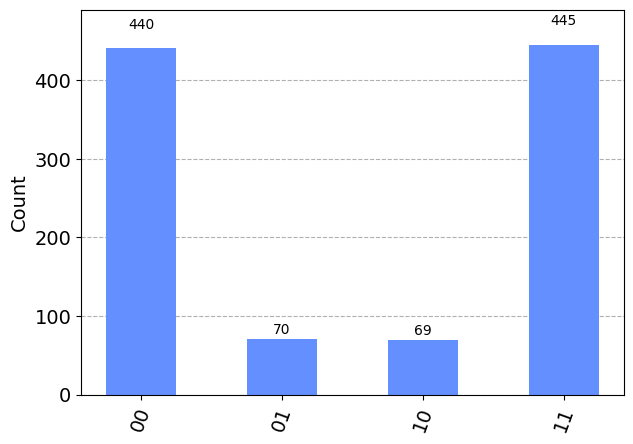

In [11]:
# prompt: make histogram

from qiskit.visualization import plot_histogram
plot_histogram(count)
